<a href="https://colab.research.google.com/github/kishore-100/CodSoft/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential,load_model
from keras.layers import Dense,LSTM,Dropout,Embedding
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding="latin-1")

In [ ]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [ ]:
df=df[['v1','v2']]

In [ ]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
labels=list(df['v1'].value_counts().index)
labels

['ham', 'spam']

In [ ]:
v=df['v1'].value_counts().values

In [ ]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


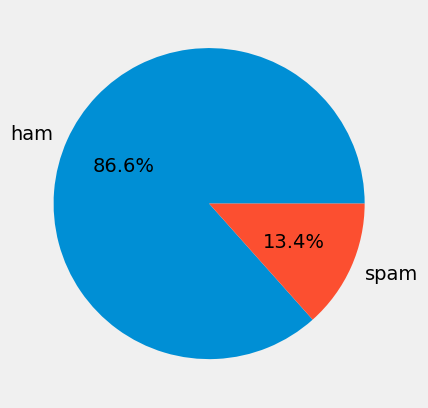

In [ ]:
plt.style.use("fivethirtyeight")
plt.pie(v,labels=labels,autopct="%1.1f%%")
plt.show()

In [ ]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
df['v1']=np.where(df['v1']=="ham",0,1)

In [ ]:
df.head(3)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
df['v2']=df['v2'].str.lower()

In [ ]:
def cleanSymbols(cell):
    symbols=string.punctuation
    for symbol in symbols:
        cell=cell.replace(symbol," ")

    cell=cell.replace("  "," ")
    return cell


In [ ]:
df['v2']=df['v2'].apply(cleanSymbols)

In [ ]:
df.head(3)

,v1,v2
0,0,go until jurong point crazy available only in...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...


In [ ]:
def cleanStopwords(cell):
    stopwords=["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
    for s in stopwords:
        s=" "+s+" "
        cell=cell.replace(s," ")
    cell=cell.replace("  "," ")
    return cell

In [ ]:
df['v2']=df['v2'].apply(cleanStopwords)

In [ ]:
df.head(3)

,v1,v2
0,0,go jurong point crazy bugis great buffet cine ...
1,0,ok lar joking wif oni
2,1,free entry 2 wkly comp win cup final tkts 21st...


In [ ]:
token=Tokenizer(num_words=100)
token.fit_on_texts(df['v2'])
seq=token.texts_to_sequences(df['v2'])
seq_pad=pad_sequences(seq,maxlen=100)

In [ ]:
seq

[[26, 34],
 [16],
 [5, 2, 54, 12, 13],
 [36, 86],
 [],
 [31, 44, 21, 11, 75],
 [],
 [87],
 [79, 41, 29, 29],
 [19, 5, 19, 5],
 [1, 80, 76, 15],
 [54, 43, 13, 11, 57, 8, 95, 17, 4],
 [60, 24, 21, 5, 41, 13, 29],
 [1],
 [1],
 [13, 40],
 [52],
 [2],
 [96, 68],
 [18, 13, 95],
 [],
 [2],
 [99, 25],
 [14, 44, 14],
 [48],
 [55],
 [55],
 [68, 10],
 [1, 47],
 [38, 68, 55],
 [66, 92, 92],
 [45, 2, 2],
 [46],
 [],
 [19, 17],
 [32, 25],
 [],
 [1],
 [14],
 [],
 [20, 26],
 [10],
 [32, 17, 84, 5, 61, 19, 5, 42],
 [],
 [26, 30, 3],
 [27],
 [],
 [],
 [45],
 [36, 1],
 [56, 9],
 [3, 3],
 [46, 42, 50, 71, 76],
 [6, 35],
 [84, 17],
 [97, 3],
 [24, 2, 4, 5, 18],
 [37],
 [],
 [77],
 [80, 58, 24],
 [7],
 [],
 [37],
 [16, 69],
 [79, 41],
 [15, 8, 11],
 [60, 29, 13, 75],
 [],
 [1],
 [72],
 [],
 [33, 51],
 [46, 6],
 [36],
 [1, 93, 5],
 [],
 [1],
 [3, 56],
 [],
 [37],
 [46],
 [16, 33],
 [6, 71],
 [],
 [1, 84],
 [2],
 [77, 11, 43],
 [1, 76, 51],
 [5],
 [45],
 [37, 48, 28, 78, 9],
 [],
 [79, 73, 43, 41],
 [63, 38],

In [ ]:
seq_pad[2]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  2, 54, 12, 13],
      dtype=int32)

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=100,output_dim=20)) #,input_length=100
model.add(LSTM(128,activation="relu",recurrent_activation="hard_sigmoid",dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(2,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
y=df['v1'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
seq_pad=seq_pad.astype("float32")

In [ ]:
model.fit(seq_pad,y,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 156ms/step - accuracy: 0.8654 - loss: 8198809976832.0000 - val_accuracy: 0.8763 - val_loss: 0.4332
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.8841 - loss: 88109449216.0000 - val_accuracy: 0.9211 - val_loss: 0.3760
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 154ms/step - accuracy: 0.9189 - loss: 0.3534 - val_accuracy: 0.9319 - val_loss: 0.3101
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.9286 - loss: 0.2893 - val_accuracy: 0.9337 - val_loss: 0.2155
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 150ms/step - accuracy: 0.9319 - loss: 0.1994 - val_accuracy: 0.9301 - val_loss: 0.1932
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 151ms/step - accuracy: 0.9396 - loss: 0.1747 - val_accuracy: 0.9319 - val_loss: 0.1778
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - accuracy: 0.9346 - loss: 2259807.5000 - val_accuracy: 0.9373 - val_loss: 0.1731
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step 

In [ ]:
model.save('spam.h5')

In [ ]:
cumle="free ticket gift daily weekly money "
cumle_seq=token.texts_to_sequences(np.array([cumle]))
cumle_pad_sequence=pad_sequences(cumle_seq,maxlen=100)

In [ ]:
cumle_pad_sequence

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  5, 72]], dtype=int32)

In [ ]:
model.predict(cumle_pad_sequence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


array([[0.862002  , 0.13799797]], dtype=float32)

In [ ]:
len(model.predict(cumle_pad_sequence)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


2

In [ ]:
spams=df[df['v1']==1]

In [ ]:
spams_seq=token.texts_to_sequences(spams['v2'])
spams_pad=pad_sequences(spams_seq,maxlen=100)

In [ ]:
sonuclar=model.predict(spams_pad)

for sonuc in sonuclar:
    if sonuc[1]>sonuc[0]:
        print("Doğru")
    else:
        print("Yanlış")

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Yanlış
Doğru
Yanlış
Doğru
Doğru
Yanlış
Doğru
Doğru
Yanlış
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Yanlış
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Yanlış
Doğru
Yanlış
Doğru
Yanlış
Yanlış
Doğru
Doğru
Doğru
Doğru
Yanlış
Doğru
Doğru
Yanlış
Doğru
Doğru
Yanlış
Yanlış
Doğru
Yanlış
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Yanlış
Doğru
Doğru
Doğru
Doğru
Doğru
Yanlış
Doğru
Doğru
Yanlış
Doğru
Yanlış
Doğru
Doğru
Doğru
Yanlış
Doğru
Doğru
Yanlış
Yanlış
Yanlış
Doğru
Doğru
Doğru
Doğru
Doğru
Yanlış
Yanlış
Doğru
Yanlış
Yanlış
Doğru
Yanlış
Doğru
Yanlış
Doğru
Yanlış
Yanlış
Doğru
Yanlış
Doğru
Doğru
Doğru
Yanlış
Doğru
Doğru
Yanlış
Doğru
Doğru
Yanlış
Doğru
Yanlış
Yanlış
Yanlış
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Yanlış
Doğru
Yanlış
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Yanlış
Yanlış
Yanlış
Doğru
Doğru
Doğru
Yanlış
Yanlış
Yanlış
Doğru
Yanlış
Doğru
Doğru
Doğru
Doğru
Doğru
Doğru
Yanlış
Doğru
Yanlış
